In [131]:
import numpy as np
import pandas as pd
import statsmodels.api as smmy
import statsmodels.stats.api as sms
# import statsmodels.formula.api as sm
from statsmodels.compat import lzip
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import svm
import sklearn
import statsmodels.api as sm
import scipy.stats as t
import statsmodels.stats as smd

In [3]:
df = pd.read_table('Kurtaev.txt')
df

,y,x1,x2,x3
1,226.558057,226.366979,35.670145,43.361373
2,225.100041,225.101691,35.320356,45.388946
3,225.249491,226.311069,35.588059,45.081189
4,224.955973,225.291101,34.786262,43.859751
5,225.056030,225.545709,35.925103,45.819399
...,...,...,...,...
296,225.555566,225.639576,35.151905,45.143516
297,225.334090,224.923959,35.277212,43.010435
298,225.685783,225.024892,34.696320,44.694494
299,225.203325,226.340226,35.351673,45.256006


In [4]:
corr_matrix = df.corr()
corr_matrix

,y,x1,x2,x3
y,1.000000,0.808021,0.422568,-0.586762
x1,0.808021,1.000000,0.676251,-0.376994
x2,0.422568,0.676251,1.000000,-0.081145
x3,-0.586762,-0.376994,-0.081145,1.000000


In [35]:
y = df['y']
y_raw = np.array(y)
y = np.array(y).reshape((-1, 1))
x1 = np.array(df['x1'])
x2 = np.array(df['x2'])
x3 = np.array(df['x3'])

In [7]:
# model_many = LinearRegression()
# model_par = LinearRegression()
# model_par.fit(y_arr, x1)


LinearRegression()

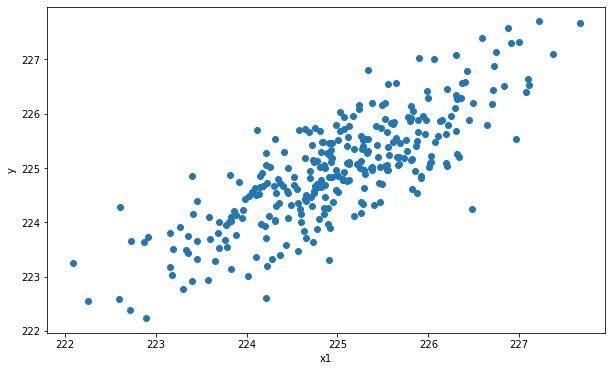

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df['x1'], y = df['y'])
plt.xlabel("x1")
plt.ylabel("y")

plt.show()

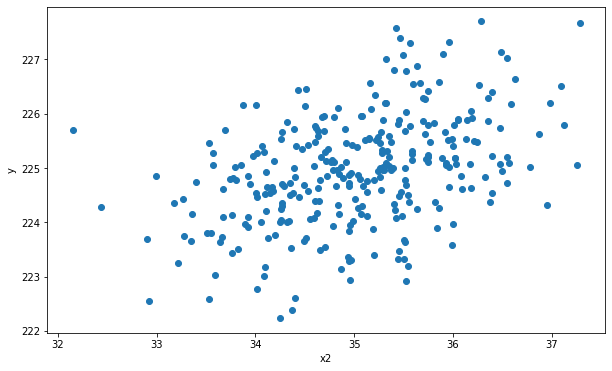

In [13]:

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df['x2'], y = df['y'])
plt.xlabel("x2")
plt.ylabel("y")

plt.show()

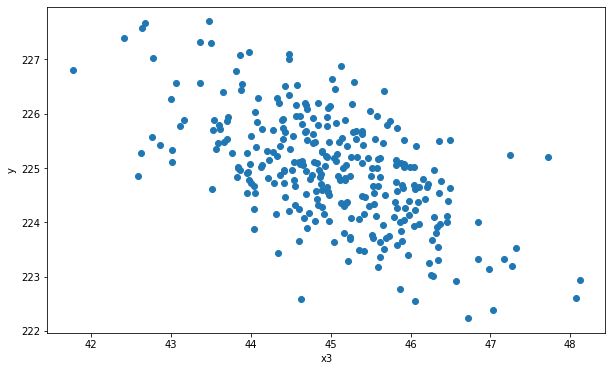

In [14]:

fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df['x3'], y = df['y'])
plt.xlabel("x3")
plt.ylabel("y")

plt.show()

In [96]:
from pprint import pp
# x1_x3 = ([[i, j] for i in x1 for j in x3])
x1_x3 = np.column_stack([x1, x3])
x1_x2_x3 = np.column_stack([x1, x2, x3])
x1_x2_x3[:20]


array([[226.36697851,  35.67014484,  43.36137331],
       [225.10169094,  35.32035589,  45.38894579],
       [226.31106899,  35.58805935,  45.08118924],
       [225.29110134,  34.78626237,  43.85975085],
       [225.54570948,  35.92510311,  45.81939887],
       [225.010124  ,  35.11266199,  46.49703959],
       [224.32052261,  34.00771616,  45.54778021],
       [224.84917394,  34.84700643,  45.41138912],
       [224.36887378,  34.94285384,  44.28764113],
       [225.02510645,  35.52021223,  44.04855528],
       [224.99690067,  35.03665497,  44.76451708],
       [227.07865341,  36.39440773,  43.65645495],
       [225.06919303,  34.10698757,  43.96754789],
       [226.19719188,  36.56338506,  45.87855609],
       [225.21852712,  36.17626872,  43.98998566],
       [223.57647339,  34.95907476,  48.12139949],
       [225.26430208,  35.55742171,  46.09003477],
       [223.35342269,  33.7666284 ,  44.3378838 ],
       [224.10281517,  35.54920527,  44.98335254],
       [227.00080046,  35.96328

In [97]:
plural_model = LinearRegression()
plural_model.fit(x1_x2_x3, y_raw)
r_squared_plural = plural_model.score(x1_x2_x3, y_raw)
r_squared_plural

0.7544562694579877

In [98]:
twin_model = LinearRegression().fit(y, x1)
r_squared_twin = twin_model.score(y, x1)
r_squared_twin


0.6528976580638981

In [104]:
print(f"PLURAL MODEL: \u0177 = {plural_model.intercept_} + {plural_model.coef_[0]}x\u2081\u1D62 + {plural_model.coef_[2]}x\u2082\u1D62 + {plural_model.coef_[1]}x\u2083\u1D62")
print(f"TWIN MODEL: \u0177 = {twin_model.intercept_} + {twin_model.coef_[0]}x\u2081\u1D62")

PLURAL MODEL: ŷ = 64.46206181427075 + 0.795924029883144x₁ᵢ + -0.30009966401113064x₂ᵢ + -0.1448665484542092x₃ᵢ
TWIN MODEL: ŷ = 46.18565345414265 + 0.7948511379648011x₁ᵢ


In [112]:
x1_x2_x3_const = sm.add_constant(x1_x2_x3)
x1_const = sm.add_constant(x1)

est_twin = sm.OLS(y, x1_const)
est_plural = sm.OLS(y, x1_x2_x3_const)

In [113]:
print(est_twin.fit().summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     560.5
Date:                Sat, 16 Oct 2021   Prob (F-statistic):           1.93e-70
Time:                        01:32:48   Log-Likelihood:                -269.78
No. Observations:                 300   AIC:                             543.6
Df Residuals:                     298   BIC:                             551.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.1476      7.806      5.143      0.0

In [114]:
print(est_plural.fit().summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     303.2
Date:                Sat, 16 Oct 2021   Prob (F-statistic):           6.56e-90
Time:                        01:33:04   Log-Likelihood:                -217.86
No. Observations:                 300   AIC:                             443.7
Df Residuals:                     296   BIC:                             458.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.4621      9.654      6.677      0.0

In [124]:
print(t.ttest_ind(df["y"], df["x1"]))
print(t.ttest_ind(df["y"], df["x2"]))
print(t.ttest_ind(df["y"], df["x3"]))

Ttest_indResult(statistic=-0.42640964791337305, pvalue=0.6699628237359341)
Ttest_indResult(statistic=2409.713058417925, pvalue=0.0)
Ttest_indResult(statistic=2171.9251089036534, pvalue=0.0)


In [128]:
model = smmy.OLS(y, x1_x2_x3_const)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     303.2
Date:                Sat, 16 Oct 2021   Prob (F-statistic):           6.56e-90
Time:                        02:10:41   Log-Likelihood:                -217.86
No. Observations:                 300   AIC:                             443.7
Df Residuals:                     296   BIC:                             458.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.4621      9.654      6.677      0.000      45.462      83.462
x1             0.7959      0.044     17.996      0.000       0.709       0.883
x2            -0.1449      0.045     -3.251      0.001      -0.233      -0.057
x3            -0.3001      0.032     -9.400      0.000      -0.363      -0.237
==============================================================================
Omnibus:                        2.856   Durbin-Watson:                   1.734
Prob(Omnibus):                  0.240   Jarque-Bera (JB):                2.567
Skew:                          -0.174   Prob(JB):                        0.277
Kurtosis:                       3.289   Cond. No.                     7.71e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [129]:
predictions = results.predict(x1_x2_x3_const)
predictions

array([226.45283526, 224.88796137, 225.90411079, 225.57500083,
       225.02457993, 224.51263036, 224.40870215, 224.74881429,
       224.68988316, 225.20030418, 225.0330459 , 226.82579905,
       225.46443302, 225.43289167, 225.27678842, 222.90633319,
       224.77264801, 224.03697915, 224.18149792, 226.9154176 ,
       225.25671994, 223.98774116, 224.52909815, 225.19571088,
       222.53956324, 224.05587199, 223.83699899, 225.71217041,
       223.5238861 , 225.59837457, 223.50243054, 227.00558443,
       224.66510294, 224.13108886, 225.66418392, 225.30839424,
       223.6784924 , 226.58905496, 224.12836633, 226.13157766,
       225.41777052, 225.12891928, 226.28085931, 224.3962665 ,
       225.19766116, 225.69724253, 223.46004894, 224.04132507,
       225.14510907, 225.05352636, 224.50864343, 224.91910718,
       226.2954444 , 225.26847606, 225.23361354, 225.83866368,
       226.1845319 , 224.78609293, 225.44734017, 226.20371113,
       225.05371165, 225.7647463 , 224.23801686, 225.25

In [130]:
residuals = results.resid


In [132]:
#DWtest
dw = smd.stattools.durbin_watson(residuals)
dw

1.7340490161488171

In [133]:
#BGtest
smd.diagnostic.acorr_breusch_godfrey(results)

D:\Programming\Python\Econometric\venv\lib\site-packages\statsmodels\stats\diagnostic.py:826: FutureWarning: The default value of nlags is changing.  After 0.12, this value will become min(10, nobs//5). Directly setnlags or period to silence this warning.
  warnings.warn("The default value of nlags is changing.  After 0.12, "


(14.81149109308607,
 0.46507924835191805,
 0.9729305043670057,
 0.48401535885885705)

In [134]:
#GQtest
gq = sms.het_goldfeldquandt(residuals,results.model.exog)
gq

(0.7382231555589357, 0.9661524698058566, 'increasing')

In [135]:
#BPtest
name=['BP','p-value']
bp=sms.het_breuschpagan(residuals,results.model.exog)
lzip(name,bp)

[('BP', 1.3255730364810536), ('p-value', 0.7230696488689703)]